In [1]:
from rlmodule_4 import *
import matplotlib.pyplot as plt

In [2]:
#initialise important parameters
q = np.ones([4,70])
w = np.ones(70)*10
gamma = 1

In [3]:
#creating a function to run a finite episode
def run_finite_episode(q,w,alpha,gamma):
  #first state will be
  state = env.reset()
  is_done = False 
  I = 1
  #loop while S is not terminal for each time step
  no_step = 0
  total_reward = 0
  while no_step < 500 and is_done == False:
    #sample an action using the policy
    action = sample_action(state,q)
    #take the action A, observe S', R
    new_state, reward, is_done, _ = env.step(action)
    if is_done == True:
      delta = reward + gamma*0 -v(w,state)
    else:
      delta = reward + gamma*v(w,new_state) -v(w,state)
    #defining some important parameters
    r_exp = reward + v(w,new_state)
    beta = r_exp - v(w,state)
    #now we will update the weight parameters
    #using adam-algorithm we will write the standard stochastic gradient descent as
    z_times_policy = 0
    prob_action = policy(state,q)
    for i in range(4):
      z_times_policy += prob_action[i]*z(state,i)
    z_ = z(state,action)
    z_times_policy = z_times_policy.transpose()
    z_ = z_.transpose()
    q += alpha*beta*(z_-z_times_policy)
    w += alpha*beta*y(state)
    no_step += 1
    total_reward += reward
    state = new_state
  return no_step,total_reward



In [4]:
def run_episode_dont_update(q,w):
  state = env.reset()
  is_done = False
  #loop while S is not terminal for each time step
  no_step = 0
  total_reward = 0
  while no_step < 500 and is_done == False:
    action = sample_action(state,q)
    new_state, reward, is_done, _ = env.step(action)
    no_step += 1
    total_reward += reward
    state = new_state
  return no_step,total_reward

In [5]:
#for first 2000 rounds of training
alpha = 0.001
#let us draw the convergence plot
reward_tot = []
no_episodes = []
tot_episodes = 0
N = 150
for i in range(20):
  rew = 0
  for j in range(N):
    steps,rew_temp = run_episode_dont_update(q,w)
    rew += rew_temp
  rew_avg = rew/N
  reward_tot.append(rew_avg)
  no_episodes.append(tot_episodes)
  #now we will train the model for 100 episodes with updates
  for j in range(100):
    a, b = run_finite_episode(q,w,alpha,gamma)
  tot_episodes += 100

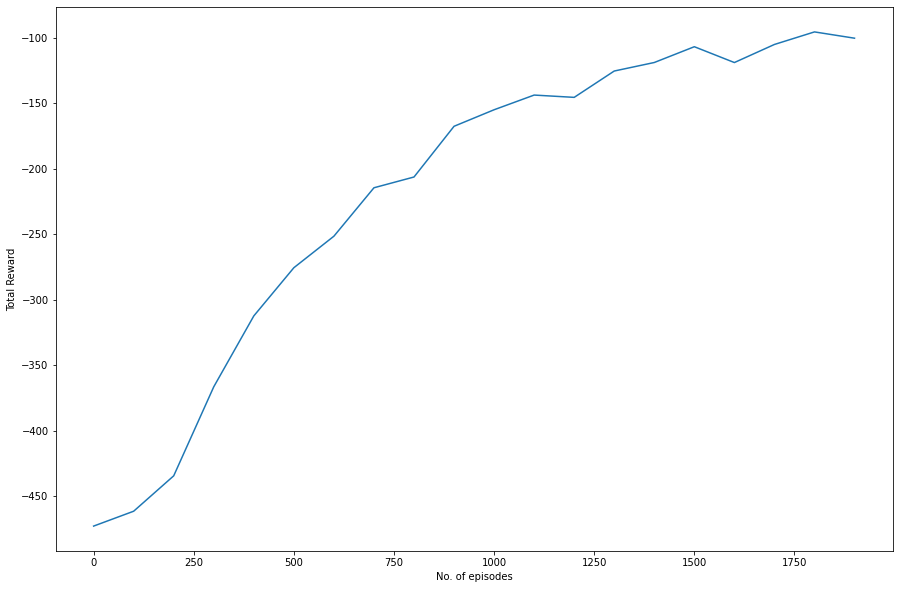

In [6]:
#let us plot the results
plt.figure(figsize=(15,10))
plt.plot(no_episodes,reward_tot)
plt.xlabel("No. of episodes")
plt.ylabel("Total Reward")
plt.show()

In [7]:
reward_tot[-1]

-100.42

In [8]:
#we want to write a function that will give a count of each trajectory
times_visited = np.zeros([7,10])
#we will sample 50 trajectories and keep a count of each state visited
no_steps = []
Tot_steps = 0
for t in range(50):
  state = env.reset()
  times_visited[3][0] += 1
  no_steps_this_loop = 0
  is_done = False
  while is_done == False:
    action = sample_action(state,q)
    new_state, reward, is_done, _ = env.step(action)
    state = new_state
    a,b = divmod(state,10)
    times_visited[a][b] += 1
    no_steps_this_loop +=1
    Tot_steps += 1
  no_steps.append(no_steps_this_loop)

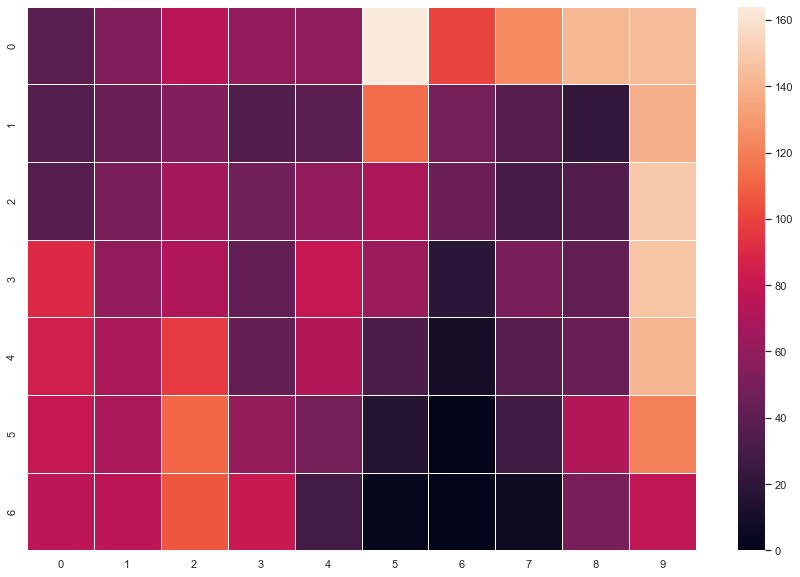

In [9]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,10)})
ax = sns.heatmap(times_visited,linewidth = 0.5)

In [10]:
aa = reward_tot

In [11]:
#for first 2000 rounds of training
alpha = 0.01
#let us draw the convergence plot
reward_tot = []
no_episodes = []
tot_episodes = 0
N = 150
for i in range(20):
  rew = 0
  for j in range(N):
    steps,rew_temp = run_episode_dont_update(q,w)
    rew += rew_temp
  rew_avg = rew/N
  reward_tot.append(rew_avg)
  no_episodes.append(tot_episodes)
  #now we will train the model for 100 episodes with updates
  for j in range(100):
    a, b = run_finite_episode(q,w,alpha,gamma)
  tot_episodes += 100

In [12]:
aa.extend(reward_tot)

In [13]:
print(aa)

[-472.85333333333335, -461.5, -434.47333333333336, -366.52, -312.41333333333336, -275.62666666666667, -251.56, -214.59333333333333, -206.37333333333333, -167.66, -155.04666666666665, -143.83333333333334, -145.58666666666667, -125.48, -118.97333333333333, -106.92666666666666, -119.00666666666666, -105.2, -95.62, -100.42, -101.25333333333333, -71.70666666666666, -63.76, -60.473333333333336, -56.70666666666666, -60.1, -50.473333333333336, -55.00666666666667, -53.846666666666664, -56.86666666666667, -58.20666666666666, -66.36666666666666, -48.38, -42.31333333333333, -43.11333333333334, -39.56, -35.88666666666666, -37.486666666666665, -33.0, -29.02]


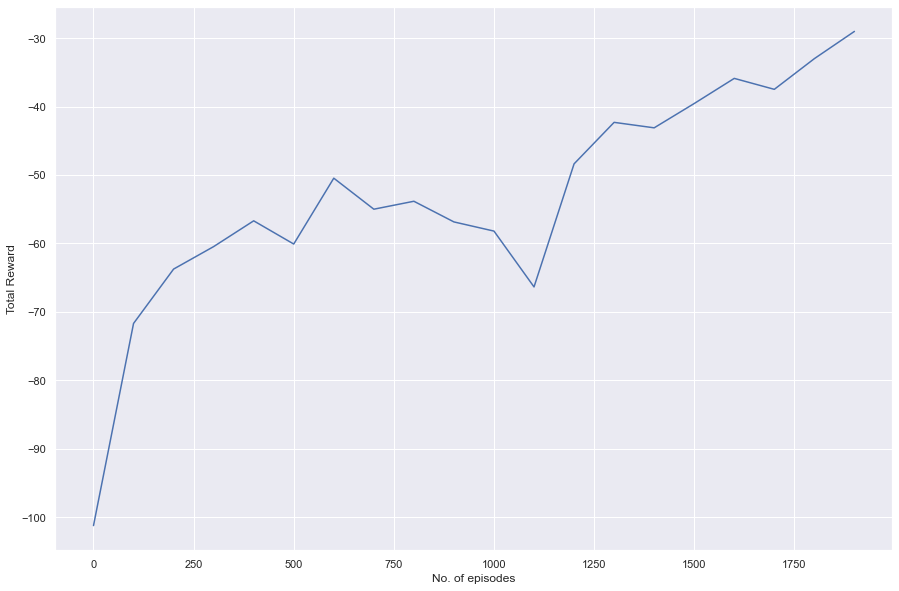

In [14]:
#let us plot the results
plt.figure(figsize=(15,10))
plt.plot(no_episodes,reward_tot)
plt.xlabel("No. of episodes")
plt.ylabel("Total Reward")
plt.show()

In [15]:
reward_tot[-1]

-29.02

In [16]:
#we want to write a function that will give a count of each trajectory
times_visited = np.zeros([7,10])
#we will sample 50 trajectories and keep a count of each state visited
no_steps = []
Tot_steps = 0
for t in range(50):
  state = env.reset()
  times_visited[3][0] += 1
  no_steps_this_loop = 0
  is_done = False
  while is_done == False:
    action = sample_action(state,q)
    new_state, reward, is_done, _ = env.step(action)
    state = new_state
    a,b = divmod(state,10)
    times_visited[a][b] += 1
    no_steps_this_loop +=1
    Tot_steps += 1
  no_steps.append(no_steps_this_loop)

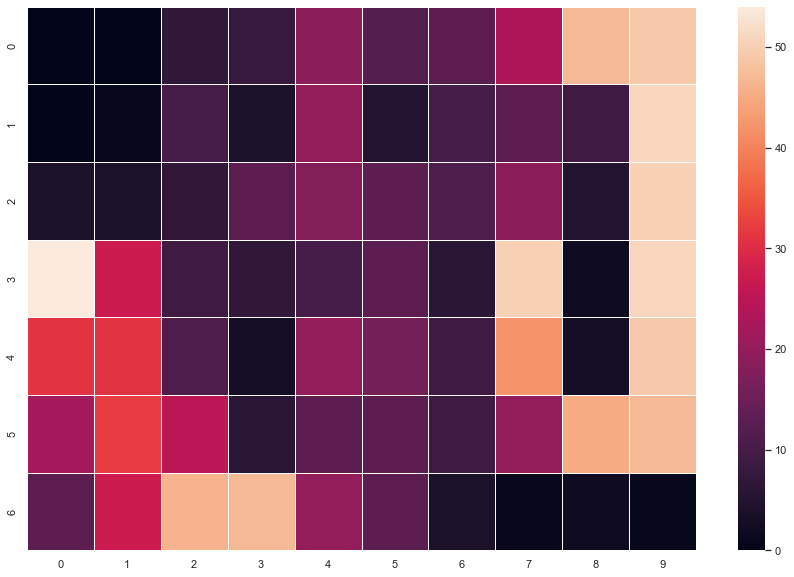

In [17]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,10)})
ax = sns.heatmap(times_visited,linewidth = 0.5)

In [18]:
#for first 2000 rounds of training
alpha = 0.1
#let us draw the convergence plot
reward_tot = []
no_episodes = []
tot_episodes = 0
N = 150
for i in range(20):
  rew = 0
  for j in range(N):
    steps,rew_temp = run_episode_dont_update(q,w)
    rew += rew_temp
  rew_avg = rew/N
  reward_tot.append(rew_avg)
  no_episodes.append(tot_episodes)
  #now we will train the model for 100 episodes with updates
  for j in range(100):
    a, b = run_finite_episode(q,w,alpha,gamma)
  tot_episodes += 100

In [19]:
aa.extend(reward_tot)

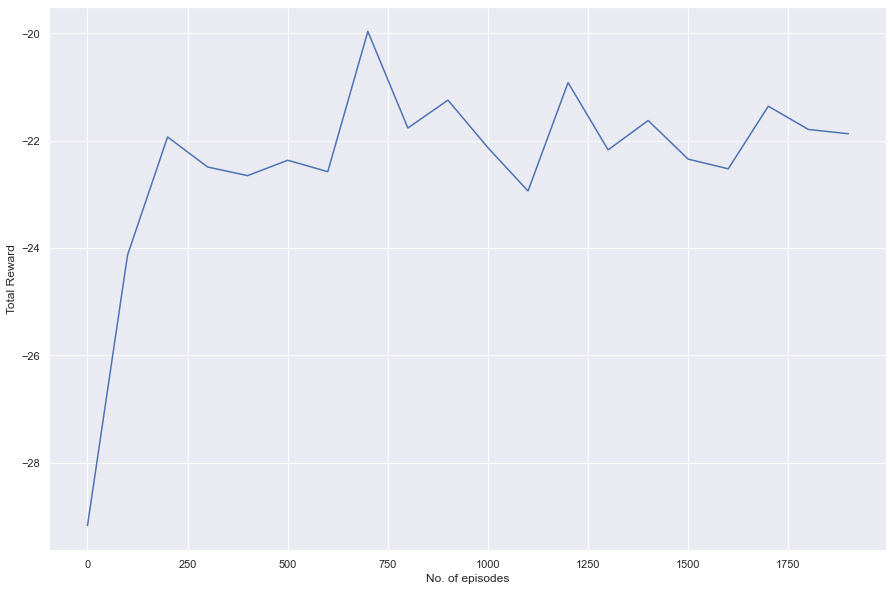

In [20]:
#let us plot the results
plt.figure(figsize=(15,10))
plt.plot(no_episodes,reward_tot)
plt.xlabel("No. of episodes")
plt.ylabel("Total Reward")
plt.show()

In [21]:
reward_tot[-1]

-21.873333333333335

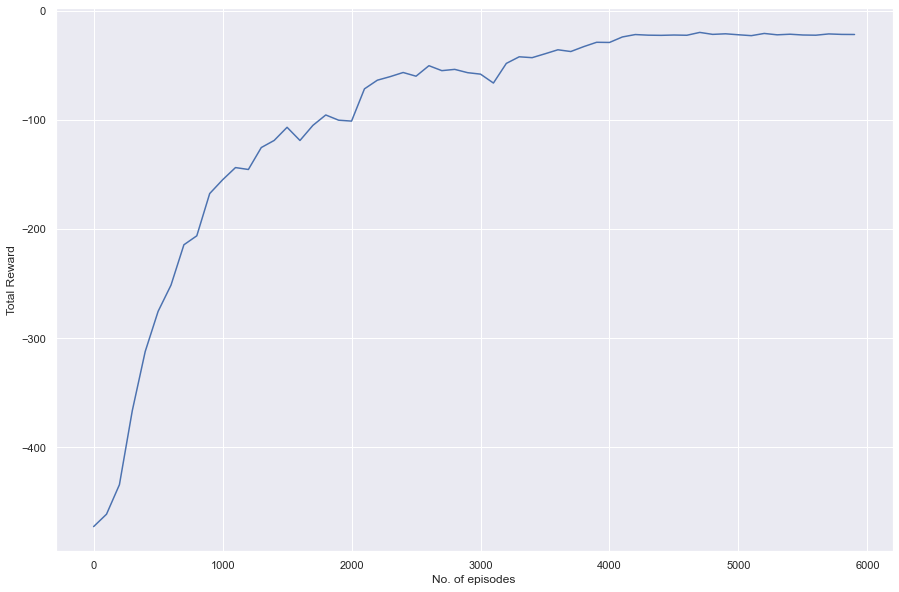

In [22]:
episodes_x = np.linspace(0,5900,60)
#let us plot the results
plt.figure(figsize=(15,10))
plt.plot(episodes_x,aa)
plt.xlabel("No. of episodes")
plt.ylabel("Total Reward")
plt.show()

In [23]:
#we want to write a function that will give a count of each trajectory
times_visited = np.zeros([7,10])
#we will sample 50 trajectories and keep a count of each state visited
no_steps = []
Tot_steps = 0
for t in range(50):
  state = env.reset()
  times_visited[3][0] += 1
  no_steps_this_loop = 0
  is_done = False
  while is_done == False:
    action = sample_action(state,q)
    new_state, reward, is_done, _ = env.step(action)
    state = new_state
    a,b = divmod(state,10)
    times_visited[a][b] += 1
    no_steps_this_loop +=1
    Tot_steps += 1
  no_steps.append(no_steps_this_loop)

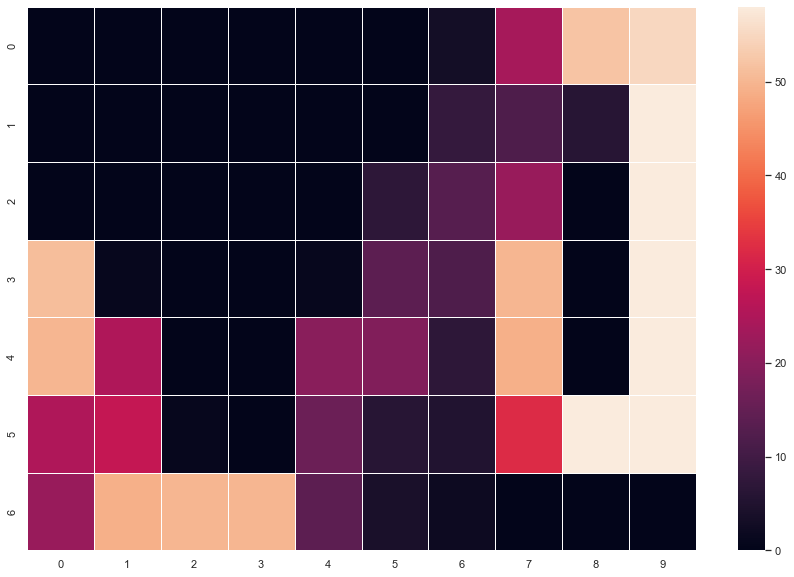

In [24]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,10)})
ax = sns.heatmap(times_visited,linewidth = 0.5)

In [25]:
#let us try to plot the value function for the grid
value_grid = np.zeros(times_visited.shape)
for i in range(7):
  for j in range(10):
    s = i*10 +j
    value_grid[i][j] = v(w,s)
val = pd.DataFrame(value_grid)
val

,0,1,2,3,4,5,6,7,8,9
0,-13.198169,-12.843157,-12.968968,-13.315656,-11.430056,-7.048236,-4.882503,-4.933701,-4.100484,-3.076338
1,-13.258691,-13.078974,-12.619287,-12.529248,-11.606194,-7.479185,-5.706298,-4.865636,-3.714508,-1.919589
2,-14.028466,-13.575958,-12.309195,-12.585613,-11.970764,-6.053777,-5.743729,-4.783197,-2.715729,-0.688607
3,-12.078194,-10.843792,-11.035767,-12.035185,-9.317363,-6.511805,-5.687233,10.000000,1.656863,0.536941
4,-11.087144,-10.085269,-9.192482,-11.132207,-6.223675,-5.255675,-0.232040,-0.018195,-0.196260,1.730842
5,-10.000556,-8.923273,-8.010347,-8.755530,-5.391377,-1.649987,0.896079,2.647962,4.582471,3.034948
6,-8.958583,-7.715724,-6.464904,-5.304900,-2.977267,0.546381,3.765070,5.238553,2.969875,2.437396


In [26]:
#let us check if the state can still work well when initialised in some random place
#we want to write a function that will give a count of each trajectory
times_visited = np.zeros([7,10])
#we will sample 50 trajectories and keep a count of each state visited
no_steps = []
Tot_steps = 0
for t in range(50):
    state = env.reset()
    for ii in range(3):
        env.step(0)
    times_visited[0][0] += 1
    no_steps_this_loop = 0
    is_done = False
    while is_done == False:
        action = sample_action(state,q)
        new_state, reward, is_done, _ = env.step(action)
        state = new_state
        a,b = divmod(state,10)
        times_visited[a][b] += 1
        no_steps_this_loop +=1
        Tot_steps += 1
    no_steps.append(no_steps_this_loop)

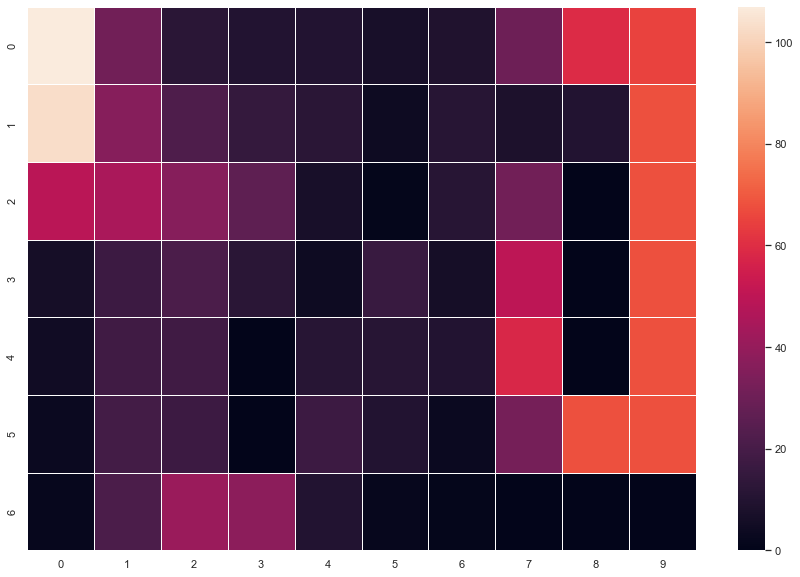

In [27]:
sns.set(rc = {'figure.figsize':(15,10)})
ax = sns.heatmap(times_visited,linewidth = 0.5)

In [28]:
av_steps = Tot_steps/50
print(av_steps)

32.08


In [29]:
#let us check if the state can still work well when initialised in some random place
#we want to write a function that will give a count of each trajectory
times_visited = np.zeros([7,10])
#we will sample 50 trajectories and keep a count of each state visited
no_steps = []
Tot_steps = 0
for t in range(50):
    state = env.reset()
    for ii in range(3):
        env.step(2)
    times_visited[6][0] += 1
    no_steps_this_loop = 0
    is_done = False
    while is_done == False:
        action = sample_action(state,q)
        new_state, reward, is_done, _ = env.step(action)
        state = new_state
        a,b = divmod(state,10)
        times_visited[a][b] += 1
        no_steps_this_loop +=1
        Tot_steps += 1
    no_steps.append(no_steps_this_loop)

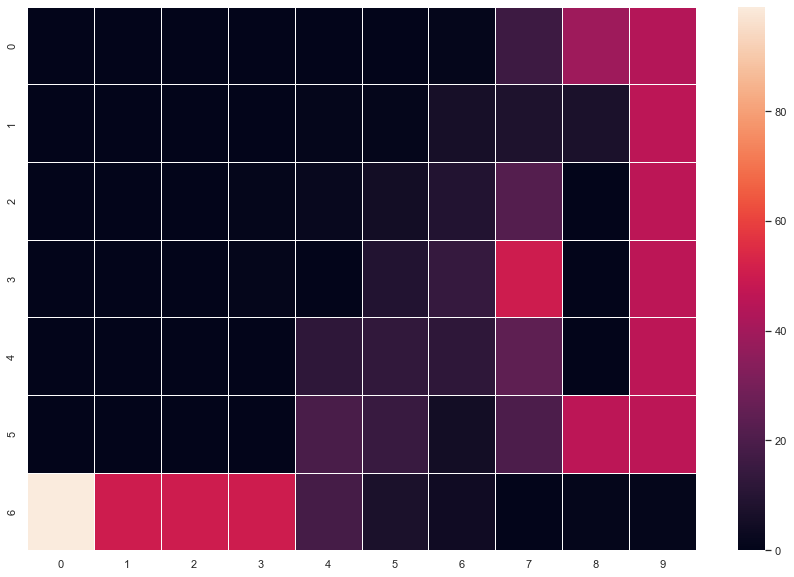

In [30]:
sns.set(rc = {'figure.figsize':(15,10)})
ax = sns.heatmap(times_visited,linewidth = 0.5)

In [31]:
av_steps = Tot_steps/50
print(av_steps)

17.24


In [32]:
#let us check if the state can still work well when initialised in some random place
#we want to write a function that will give a count of each trajectory
times_visited = np.zeros([7,10])
#we will sample 50 trajectories and keep a count of each state visited
no_steps = []
Tot_steps = 0
for t in range(50):
    state = env.reset()
    for ii in range(3):
        env.step(2)
        env.step(1)
    times_visited[6][3] += 1
    no_steps_this_loop = 0
    is_done = False
    while is_done == False:
        action = sample_action(state,q)
        new_state, reward, is_done, _ = env.step(action)
        state = new_state
        a,b = divmod(state,10)
        times_visited[a][b] += 1
        no_steps_this_loop +=1
        Tot_steps += 1
    no_steps.append(no_steps_this_loop)

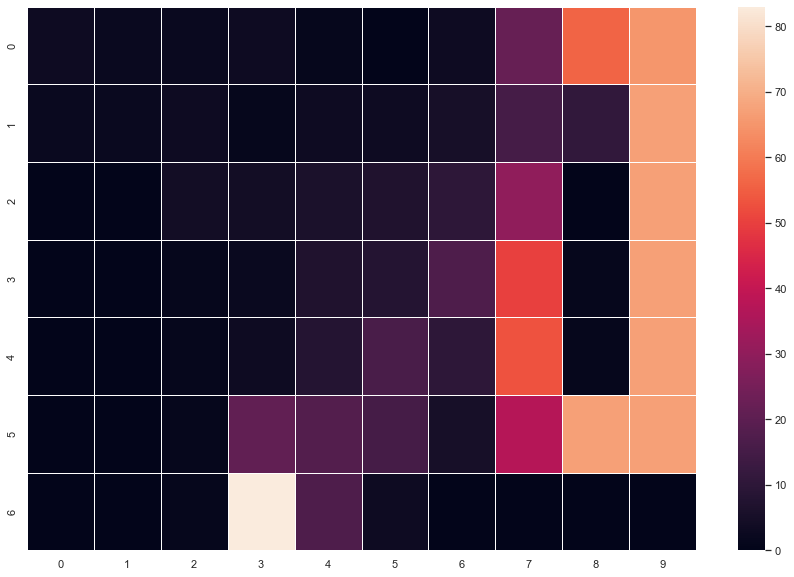

In [33]:
sns.set(rc = {'figure.figsize':(15,10)})
ax = sns.heatmap(times_visited,linewidth = 0.5)

In [34]:
av_steps = Tot_steps/50
print(av_steps)

19.88


In [35]:
#let us check if the state can still work well when initialised in some random place
#we want to write a function that will give a count of each trajectory
times_visited = np.zeros([7,10])
#we will sample 50 trajectories and keep a count of each state visited
no_steps = []
Tot_steps = 0
for t in range(50):
    state = env.reset()
    for ii in range(1):
        env.step(0)
        env.step(1)
    times_visited[3][2] += 1
    no_steps_this_loop = 0
    is_done = False
    while is_done == False:
        action = sample_action(state,q)
        new_state, reward, is_done, _ = env.step(action)
        state = new_state
        a,b = divmod(state,10)
        times_visited[a][b] += 1
        no_steps_this_loop +=1
        Tot_steps += 1
    no_steps.append(no_steps_this_loop)

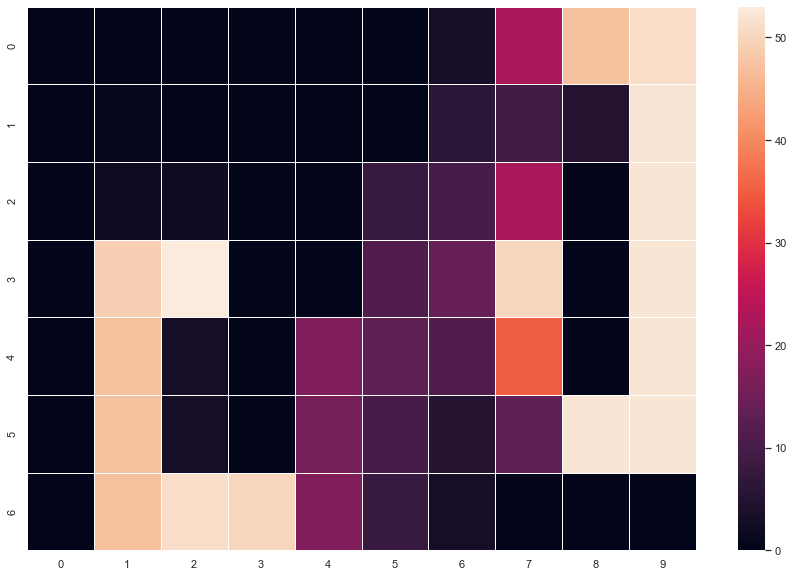

In [36]:
sns.set(rc = {'figure.figsize':(15,10)})
ax = sns.heatmap(times_visited,linewidth = 0.5)

In [37]:
av_steps = Tot_steps/50
print(av_steps)

20.46
